In [1]:
# Pandas
from config import DB_USER, DB_PASS, DB_ENDPOINT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# SQL Alchemy
from sqlalchemy import create_engine

In [2]:
 # Create Engine
engine = create_engine(f"postgresql://{DB_USER}:{DB_PASS}@{DB_ENDPOINT}")
conn = engine.connect()

In [3]:
# Query All Records in the the Database
data = pd.read_sql("SELECT * FROM historical", conn)
data.head()

,index,crypto,time,open,high,low,close,volume,trade
0,0,bitcoin_usdt,1.511914e+09,9896.79000000,11300.03000000,8520.00000000,9687.88000000,13352.53871500,8662.63236200
1,1,bitcoin_usdt,1.512000e+09,9687.88000000,10900.00000000,8850.80000000,9838.96000000,9389.57432900,5360.66024200
2,2,bitcoin_usdt,1.512086e+09,9837.00000000,10898.00000000,9380.00000000,10782.99000000,6134.92363300,3269.86858800
3,3,bitcoin_usdt,1.512173e+09,10775.04000000,11190.00000000,10620.00000000,10890.01000000,4765.43975700,2390.19427500
4,4,bitcoin_usdt,1.512259e+09,10902.69000000,11825.00000000,10500.00000000,11165.41000000,5346.63652400,2574.24618700


In [4]:
data = data.drop(labels=["index"], axis=1)
data

,crypto,time,open,high,low,close,volume,trade
0,bitcoin_usdt,1.511914e+09,9896.79000000,11300.03000000,8520.00000000,9687.88000000,13352.53871500,8662.63236200
1,bitcoin_usdt,1.512000e+09,9687.88000000,10900.00000000,8850.80000000,9838.96000000,9389.57432900,5360.66024200
2,bitcoin_usdt,1.512086e+09,9837.00000000,10898.00000000,9380.00000000,10782.99000000,6134.92363300,3269.86858800
3,bitcoin_usdt,1.512173e+09,10775.04000000,11190.00000000,10620.00000000,10890.01000000,4765.43975700,2390.19427500
4,bitcoin_usdt,1.512259e+09,10902.69000000,11825.00000000,10500.00000000,11165.41000000,5346.63652400,2574.24618700
...,...,...,...,...,...,...,...,...
6024,solana_usdt,1.637798e+09,205.76000000,216.35000000,201.93000000,209.97000000,1764837.19000000,886350.87000000
6025,solana_usdt,1.637885e+09,209.94000000,210.53000000,182.70000000,192.42000000,2776105.44000000,1241556.23000000
6026,solana_usdt,1.637971e+09,192.37000000,199.39000000,190.61000000,192.74000000,1028955.27000000,500367.73000000
6027,solana_usdt,1.638058e+09,192.74000000,202.10000000,180.93000000,200.69000000,1560980.85000000,789804.92000000


In [5]:
ethereum_df = data[data["crypto"] == "ethereum_usdt"]
ethereum_df = ethereum_df.reset_index(drop=True)

In [6]:
#take only the first 365 rows.
#ethereum_df = ethereum_df.iloc[:365]

In [7]:
ethereum_df["time"] = pd.to_datetime(ethereum_df['time'], unit="s")
ethereum_df

,crypto,time,open,high,low,close,volume,trade
0,ethereum_usdt,2017-11-29,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
1,ethereum_usdt,2017-11-30,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2,ethereum_usdt,2017-12-01,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
3,ethereum_usdt,2017-12-02,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
4,ethereum_usdt,2017-12-03,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000
...,...,...,...,...,...,...,...,...
1457,ethereum_usdt,2021-11-25,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000
1458,ethereum_usdt,2021-11-26,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000
1459,ethereum_usdt,2021-11-27,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000
1460,ethereum_usdt,2021-11-28,4095.29000000,4298.51000000,3964.00000000,4294.78000000,346471.35510000,174386.81870000


In [8]:
#actual valuues for last 14 days
projection = 14
original_close = ethereum_df["close"][-projection:]
print(original_close)

1448    4209.76000000
1449    4287.80000000
1450    3996.90000000
1451    4294.76000000
1452    4412.17000000
1453    4258.31000000
1454    4085.97000000
1455    4339.44000000
1456    4269.36000000
1457    4524.85000000
1458    4041.20000000
1459    4095.29000000
1460    4294.78000000
1461    4444.53000000
Name: close, dtype: object


In [9]:
# make the predictions 3 days in the future for the target.
ethereum_df["prediction"] = ethereum_df["close"].shift(-projection, fill_value=0)
ethereum_df

,crypto,time,open,high,low,close,volume,trade,prediction
0,ethereum_usdt,2017-11-29,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000,683.99000000
1,ethereum_usdt,2017-11-30,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000,679.76000000
2,ethereum_usdt,2017-12-01,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000,674.95000000
3,ethereum_usdt,2017-12-02,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000,682.81000000
4,ethereum_usdt,2017-12-03,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000,707.64000000
...,...,...,...,...,...,...,...,...,...
1457,ethereum_usdt,2021-11-25,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000,0
1458,ethereum_usdt,2021-11-26,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000,0
1459,ethereum_usdt,2021-11-27,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000,0
1460,ethereum_usdt,2021-11-28,4095.29000000,4298.51000000,3964.00000000,4294.78000000,346471.35510000,174386.81870000,0


In [10]:
ethereum_df = ethereum_df.set_index("time")
ethereum_df

,crypto,open,high,low,close,volume,trade,prediction
time,,,,,,,,
2017-11-29,ethereum_usdt,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000,683.99000000
2017-11-30,ethereum_usdt,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000,679.76000000
2017-12-01,ethereum_usdt,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000,674.95000000
2017-12-02,ethereum_usdt,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000,682.81000000
2017-12-03,ethereum_usdt,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000,707.64000000
...,...,...,...,...,...,...,...,...
2021-11-25,ethereum_usdt,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000,0
2021-11-26,ethereum_usdt,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000,0
2021-11-27,ethereum_usdt,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000,0


In [11]:
# drop the crypto column which is just a name
ethereum_df = ethereum_df.drop("crypto", axis=1)
ethereum_df

,open,high,low,close,volume,trade,prediction
time,,,,,,,
2017-11-29,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000,683.99000000
2017-11-30,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000,679.76000000
2017-12-01,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000,674.95000000
2017-12-02,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000,682.81000000
2017-12-03,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000,707.64000000
...,...,...,...,...,...,...,...
2021-11-25,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000,0
2021-11-26,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000,0
2021-11-27,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000,0


In [12]:
ethereum_df.dtypes

open          object
high          object
low           object
close         object
volume        object
trade         object
prediction    object
dtype: object

In [13]:
# convert to numerical
ethereum_df = ethereum_df.astype({"open": float, "high": float, "low":float, "close": float, "volume": float, "trade": float, "prediction": float})
ethereum_df.dtypes

open          float64
high          float64
low           float64
close         float64
volume        float64
trade         float64
prediction    float64
dtype: object

In [14]:
# remove the last 14 rows from the data (days we want to predict)
X = ethereum_df[:-projection]

In [15]:
# use 2017-2020 data for train
X = X.drop("prediction", axis=1)
#X = X[:-projection]
X

,open,high,low,close,volume,trade
time,,,,,,
2017-11-29,466.17,515.00,385.00,421.70,51313.49571,23825.39377
2017-11-30,421.92,460.00,387.01,427.43,45184.22265,24018.42012
2017-12-01,428.05,465.97,413.74,457.51,33072.21995,19043.24922
2017-12-02,457.53,471.91,445.00,457.63,25796.14000,12336.59141
2017-12-03,457.31,485.90,440.11,460.30,24490.05997,12239.10293
...,...,...,...,...,...,...
2021-11-11,4628.68,4779.00,4576.47,4719.00,303688.97650,157894.35770
2021-11-12,4719.00,4809.71,4507.85,4665.46,461580.04150,233963.11590
2021-11-13,4665.47,4707.60,4584.08,4644.28,220720.66110,118424.28400


In [16]:
# remove the last 14 rows from the data (days we want to predict)
y = ethereum_df[:-projection]

In [17]:
# Set y_ train
y = y["prediction"]
#y = y[:-projection]
y

time
2017-11-29     683.99
2017-11-30     679.76
2017-12-01     674.95
2017-12-02     682.81
2017-12-03     707.64
               ...   
2021-11-11    4524.85
2021-11-12    4041.20
2021-11-13    4095.29
2021-11-14    4294.78
2021-11-15    4444.53
Name: prediction, Length: 1448, dtype: float64

LR: 0.271902 (0.448225)
Lasso: 0.442444 (0.295842)
Ridge: -0.136000 (0.761228)
RF: -0.227787 (0.945429)
XGBOOST: -0.259444 (0.886974)
NN: 0.706861 (0.104214)
KNN: -7.788898 (7.577021)
SVR: -12.103923 (14.053634)


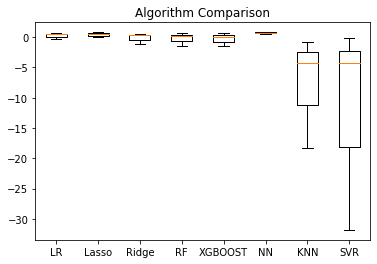

In [18]:
import warnings
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score


warnings.simplefilter("ignore")

models = []
models.append(('LR', LinearRegression(normalize=True)))
models.append(('Lasso', Lasso(normalize=True))) 
models.append(('Ridge', Ridge(normalize=True))) 
models.append(('RF', RandomForestRegressor(n_estimators = 200)))
models.append(('XGBOOST', XGBRegressor(n_estimators = 200, verbosity = 0)))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR(gamma='auto')))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    tscv = TimeSeriesSplit(n_splits=3)
    cv_results = cross_val_score(model, X, y, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    #print("TRAIN:", train_index, "TEST:", test_index)
    
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

We can see that Linear Regression, Lasso and NN models appear to perform the best. Serdar is already building a NN model, so we will dig further into Lasso.

Are Low R-squared Values Always a Problem?
No! Regression models with low R-squared values can be perfectly good models for several reasons.

Some fields of study have an inherently greater amount of unexplainable variation. In these areas, your R2 values are bound to be lower. For example, studies that try to explain human behavior generally have R2 values less than 50%. People are just harder to predict than things like physical processes.

Fortunately, if you have a low R-squared value but the independent variables are statistically significant, you can still draw important conclusions about the relationships between the variables. Statistically significant coefficients continue to represent the mean change in the dependent variable given a one-unit shift in the independent variable. Clearly, being able to draw conclusions like this is vital.

In [19]:
# X = X.values
# y = y.values

In [20]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_validate

# estimator=MLPRegressor()


# param_grid = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,1)],
#           'activation': ['relu','tanh','logistic'],
#           'alpha': [0.0001, 0.05],
#           'learning_rate': ['constant','adaptive'],
#           'solver': ['adam']}

# gsc = GridSearchCV(
#     estimator,
#     param_grid,
#     cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

# grid_result = gsc.fit(X, y)


# best_params = grid_result.best_params_

# best_mlp = MLPRegressor(hidden_layer_sizes = best_params["hidden_layer_sizes"], 
#                         activation =best_params["activation"],
#                         solver=best_params["solver"],
#                         max_iter= 5000, n_iter_no_change = 200
#               )

# scoring = {
#            'abs_error': 'neg_mean_absolute_error',
#            'squared_error': 'neg_mean_squared_error',
#            'r2':'r2'}

# scores = cross_validate(best_mlp, X, y, cv=10, scoring=scoring, return_train_score=True, return_estimator = True)

In [21]:
# We need to set our training and testing data.
# We want all of the data except the last 30 days to train on, and we will test on the last 30 days, 
# excluding the last 14 days we removed to predict for.

#remove the last X (projection) number of days we want to predict for
X_train = ethereum_df[:-projection]
#remove last 30 days we want to keep as test data and drop our label which is the prediction column
X_train = X_train[:-30].drop("prediction",axis=1)


y_train = ethereum_df[:-projection]
y_train = y_train[:-30]
y_train = y_train["prediction"]
y_train

time
2017-11-29     683.99
2017-11-30     679.76
2017-12-01     674.95
2017-12-02     682.81
2017-12-03     707.64
               ...   
2021-10-12    4131.52
2021-10-13    3922.00
2021-10-14    4286.02
2021-10-15    4418.89
2021-10-16    4322.68
Name: prediction, Length: 1418, dtype: float64

In [22]:
# Our testing set will be the last 30 days excluding the dates we want to predict for.
X_test = ethereum_df[:-projection]
# Just the last 30 days
X_test = X_test[-30:].drop("prediction", axis=1)
X_test

y_test = ethereum_df[:-projection]
y_test = y_test[-30:]
y_test = y_test["prediction"]
y_test

time
2021-10-17    4287.21
2021-10-18    4319.43
2021-10-19    4589.89
2021-10-20    4603.35
2021-10-21    4532.32
2021-10-22    4474.24
2021-10-23    4518.00
2021-10-24    4612.59
2021-10-25    4807.98
2021-10-26    4732.33
2021-10-27    4628.78
2021-10-28    4719.00
2021-10-29    4665.46
2021-10-30    4644.28
2021-10-31    4626.50
2021-11-01    4563.78
2021-11-02    4209.76
2021-11-03    4287.80
2021-11-04    3996.90
2021-11-05    4294.76
2021-11-06    4412.17
2021-11-07    4258.31
2021-11-08    4085.97
2021-11-09    4339.44
2021-11-10    4269.36
2021-11-11    4524.85
2021-11-12    4041.20
2021-11-13    4095.29
2021-11-14    4294.78
2021-11-15    4444.53
Name: prediction, dtype: float64

In [23]:
model = Lasso(normalize=True)

model.fit(X_train, y_train)
print(model.score(X_test,y_test))

-3.4532621033585746


In [24]:
unseen_data = ethereum_df[-projection:]
unseen_data = unseen_data.drop("prediction", axis=1)
unseen_data

,open,high,low,close,volume,trade
time,,,,,,
2021-11-16,4563.77,4563.77,4103.00,4209.76,735857.0630,354749.4963
2021-11-17,4209.59,4299.91,4063.48,4287.80,472852.1842,230168.3863
2021-11-18,4288.07,4344.81,3956.44,3996.90,576945.1837,271503.5573
2021-11-19,3996.90,4308.97,3973.01,4294.76,420045.0897,220791.4006
2021-11-20,4294.75,4435.88,4199.86,4412.17,365584.5780,184875.7626
2021-11-21,4412.17,4451.00,4242.41,4258.31,340206.3203,163875.6246
2021-11-22,4259.70,4320.00,4022.74,4085.97,518501.3338,252693.2206
2021-11-23,4086.28,4385.59,4059.62,4339.44,502811.7902,257182.2577
2021-11-24,4339.45,4373.94,4167.65,4269.36,448727.0306,224088.2362


In [25]:

predictions = model.predict(unseen_data)
data = pd.DataFrame()
data["actual"] = unseen_data["close"]
data["predictions"] = predictions
data["difference ($)"] = data["predictions"] - data["actual"]
data["difference (%)"] = data["difference ($)"] / data["actual"] *100
data

,actual,predictions,difference ($),difference (%)
time,,,,
2021-11-16,4209.76,4229.038892,19.278892,0.457957
2021-11-17,4287.80,4257.685261,-30.114739,-0.702335
2021-11-18,3996.90,4043.216938,46.316938,1.158822
2021-11-19,4294.76,4223.628483,-71.131517,-1.656240
2021-11-20,4412.17,4387.500463,-24.669537,-0.559125
2021-11-21,4258.31,4315.767347,57.457347,1.349299
2021-11-22,4085.97,4122.994279,37.024279,0.906132
2021-11-23,4339.44,4286.176611,-53.263389,-1.227425
2021-11-24,4269.36,4290.803238,21.443238,0.502259


In [26]:
print(data["difference (%)"].mean())

-0.11981953268511233


The model prediction is only off by -0.12% on average!

<AxesSubplot:xlabel='time'>

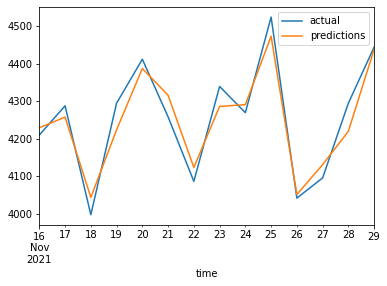

In [27]:
#plot chart
data.plot(y=["actual", "predictions"])

In [30]:
data = pd.DataFrame()
data["scores"] = model.coef_
data["features"] = ethereum_df.drop("prediction",axis=1).columns.tolist()
data

,scores,features
0,0.000000,open
1,0.000000,high
2,0.421114,low
3,0.582497,close
4,0.000000,volume
5,0.000001,trade


<AxesSubplot:xlabel='features'>

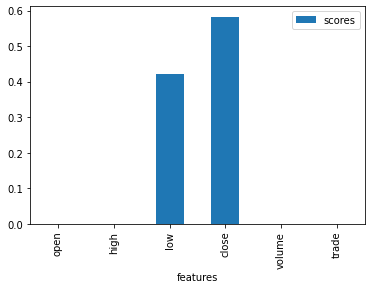

In [31]:
data.plot(kind="bar", x="features", y="scores")

it seems the low and the close are the most relevant features